<a href="https://colab.research.google.com/github/RLWH/tensorflow-certification-labs/blob/main/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Improving Computer Vision Accuracy using Convolutions



# Shallow Neural Network
In the previous lessons, you saw how to do fashion recognition using a neural network containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and only one hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy. For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [1]:
import tensorflow as tf

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalise the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Define the shallow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [4]:
# Setup training parameters
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
print(f'\nMODEL TRAINING: ')
model.fit(training_images, training_labels, epochs=5)


MODEL TRAINING: 
Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4983 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8903


In [6]:
print(f'\nMODEL EVALUATION: ')
test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION: 
313/313 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8770


# Convolutional Neural Network
In the model above, your accuracy will probably be about 89% on training and 87% on validation. Not bad. But how do you make that even better? 

One way is to use something called *convolutions*. 

In short, doing convolution is to take an array (usually 3x3 or 5x5) and scan it over the entire image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. 

Using convolution is perfect for computer vision because it often highlights features that distinguish one item from another. Moreover, the amount of information needed is then much less because you'll just train on the highlighted features. 


In [11]:
# Define the model
model = tf.keras.models.Sequential([

    # Convnet
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before - Flatten and ense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [13]:
# Use the same settings
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
print(f'\nMODEL TRAINING: ')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION: ')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING: 
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4675 - accuracy: 0.8296
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3141 - accuracy: 0.8855
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - accuracy: 0.9003
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2393 - accuracy: 0.9104
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2184 - accuracy: 0.9171

MODEL EVALUATION: 
313/313 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.9049


So it gone up to about 925 on the trianing data and 90% on the validation data.

# Visualising the Convolutions and Pooling

First, we need to print the first 100 labels in the test set. We select index `0`, `23`, `28` as they are all have the same value `9` - which are shoes. 

In [15]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


Let's take a look at the result of running the convolution on each, and we begin to see common features between them emerge. 

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

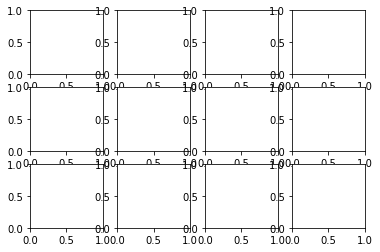

In [19]:
f, axarr = plt.subplots(3,4)

In [20]:
# Assign some indices
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

In [22]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [23]:
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 11, 11, 32) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 5, 5, 32) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 800) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>]

In [32]:
activation_model

1/1 [==============================] - 0s 16ms/step
(1, 26, 26, 32)
1/1 [==============================] - 0s 15ms/step
(1, 13, 13, 32)
1/1 [==============================] - 0s 13ms/step
(1, 11, 11, 32)
1/1 [==============================] - 0s 16ms/step
(1, 5, 5, 32)
1/1 [==============================] - 0s 13ms/step


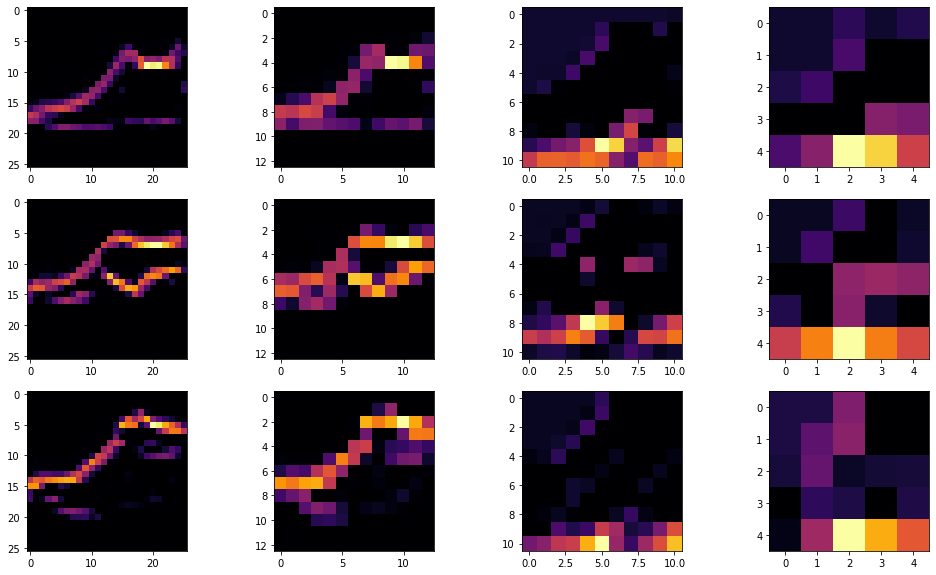

In [34]:
f, axarr = plt.subplots(3, 4, figsize=(17, 10))

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  print(f1.shape)
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Exercises 1
Try editing the convolutions. Change the 32s to either 16 or 64. 

Inspect the accuracy and/or training time. 

## 64 Convolutions

In [35]:
# Define the model
model = tf.keras.models.Sequential([

    # Convnet
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before - Flatten and ense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [36]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [37]:
# Use the same settings
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
print(f'\nMODEL TRAINING: ')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION: ')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING: 
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4445 - accuracy: 0.8389
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2961 - accuracy: 0.8926
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2488 - accuracy: 0.9093
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2159 - accuracy: 0.9199
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1876 - accuracy: 0.9298

MODEL EVALUATION: 
313/313 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.8985


The training time is similar, but the testing accuracy of the model is slightly lower (From loss: 0.2583 - accuracy: 0.9049 to loss: 0.2701 - accuracy: 0.8985)

## 16 Convolutions

In [39]:
# Define the model
model = tf.keras.models.Sequential([

    # Convnet
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before - Flatten and ense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [42]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
print(f'\nMODEL TRAINING: ')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION: ')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING: 
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4901 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3397 - accuracy: 0.8751
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.8913
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2718 - accuracy: 0.8989
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2512 - accuracy: 0.9073

MODEL EVALUATION: 
313/313 [==============================] - 1s 3ms/step - loss: 0.2939 - accuracy: 0.8937


# Exercise 2
Removing the final convolution. What impact will it have?

Hypothesis: 
- It should speed up training
- Accuracy should lower

In [44]:
# Define the model
model = tf.keras.models.Sequential([

    # Convnet
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before - Flatten and ense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               692352    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [46]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
print(f'\nMODEL TRAINING: ')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION: ')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING: 
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3899 - accuracy: 0.8603
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9038
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2193 - accuracy: 0.9197
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1890 - accuracy: 0.9298
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1590 - accuracy: 0.9413

MODEL EVALUATION: 
313/313 [==============================] - 1s 3ms/step - loss: 0.2674 - accuracy: 0.9073


Result - No Impact on training time, accuracy slighly the same

# Exercise 3 - Adding extra convolution layer


In [48]:
# Define the model
model = tf.keras.models.Sequential([

    # Convnet
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),


    # Add the same layers as before - Flatten and ense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 32)        

In [50]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [51]:
print(f'\nMODEL TRAINING: ')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION: ')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING: 
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6361 - accuracy: 0.7633
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4330 - accuracy: 0.8422
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3715 - accuracy: 0.8642
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3367 - accuracy: 0.8765
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3107 - accuracy: 0.8856

MODEL EVALUATION: 
313/313 [==============================] - 1s 3ms/step - loss: 0.3470 - accuracy: 0.8754
